## Import libraries<a name="import"></a>

In [65]:
import os
import pyxdf # xdf file importation
import matplotlib.pyplot as plt
import numpy as np

from my_functions import *


### Ensure that the root directory is the project directory
In some cases, the root directory may not be the project directory. This is usually the case when the notebook is run from a subdirectory of the project directory.

In [66]:
# if pwd is SRC  change to root
print("Current working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())
print(os.path.basename(os.getcwd()))

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Stage_Signal_Physio


In [67]:
plt.close("all")  # close all figure windows

## Initialization

### Xdf file selection and loading (REARM data)

In [68]:
# Define the xdf file of interest
#xdf_input_filename="001_MolLud_20201112_1_c.xdf"
xdf_input_filename="020_DesMar_20211129_1_c.xdf"

xdf_input_filepath=os.path.normpath("DAT/INPUT/"+xdf_input_filename)

In [69]:
# definition of the EEG channels' names
channels_dict = {"Channel_1": "C4",
                "Channel_2": "FC2",
                "Channel_3": "FC6",
                "Channel_4": "CP2",
                "Channel_5": "C3",
                "Channel_6": "FC1",
                "Channel_7": "FC5",
                "Channel_8": "CP1"}

In [70]:
test0=retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath,stream_type="EEG")
print(test0["infos"]["channels"]["names"])
print(test0["infos"]["channels"]["units"])

['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8']
['microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts']


In [71]:
test1 = retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath,stream_type="MoCap",stream_name="Mouse")
test2 = retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath,stream_type="Markers",stream_name="MouseToNIC")

"""
mouse_marker_times=test2["data"]["timestamps"]-mouse_marker_data["data"]["timestamps"][0]
mouse_marker_labels=test2["data"]["time_series"]

mouse_marker_times_labels = create_marker_times_labels_array(marker_time_stamps=mouse_marker_times,marker_labels=mouse_marker_labels.astype(str))
"""

'\nmouse_marker_times=test2["data"]["timestamps"]-mouse_marker_data["data"]["timestamps"][0]\nmouse_marker_labels=test2["data"]["time_series"]\n\nmouse_marker_times_labels = create_marker_times_labels_array(marker_time_stamps=mouse_marker_times,marker_labels=mouse_marker_labels.astype(str))\n'

In [72]:
mouse_marker_times_labels = create_marker_times_labels_array2(xdf_input_filepath=xdf_input_filepath)
mouse_marker_times_labels[:,0] -= mouse_marker_times_labels2[0,0] #make times start in reference to the first timestamp instead of unix epoch.

In [73]:
mouse_mocap_data=retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath,stream_type="MoCap",stream_name="Mouse")

mouse_mocap_times = mouse_mocap_data["data"]["timestamps"]-mouse_mocap_data["data"]["timestamps"][0]
mouse_mocap_positions_xy = mouse_mocap_data["data"]["time_series"][:,0:2] #select only x and y position data
mouse_mocap_positions_units = np.unique(mouse_mocap_data["infos"]["channels"]["units"][0:2])[0]
mouse_mocap_sample_rate = mouse_mocap_data["infos"]["sample_rate"]["effective"]

mouse_mocap_speeds = compute_tangential_speed(coordinates=mouse_mocap_positions_xy,
                                            sample_rate=mouse_mocap_sample_rate)

mouse_mocap_speeds_threshold = 0.05*np.max(mouse_mocap_speeds)
print(f"mouse_mocap_speed_threshold = {mouse_mocap_speeds_threshold} ({mouse_mocap_positions_units}/s) ")

print(f"vt_max= {np.max(mouse_mocap_speeds)} ({mouse_mocap_positions_units}/s)")
print(f"vt_min= {np.min(mouse_mocap_speeds)} ({mouse_mocap_positions_units}/s)")
print(f"vt_moy= {np.mean(mouse_mocap_speeds)} ({mouse_mocap_positions_units}/s)")

mouse_mocap_speed_threshold = 5007.724551040956 (pixels/s) 
vt_max= 100154.4910208191 (pixels/s)
vt_min= 93.92194728374322 (pixels/s)
vt_moy= 1197.3543401322866 (pixels/s)


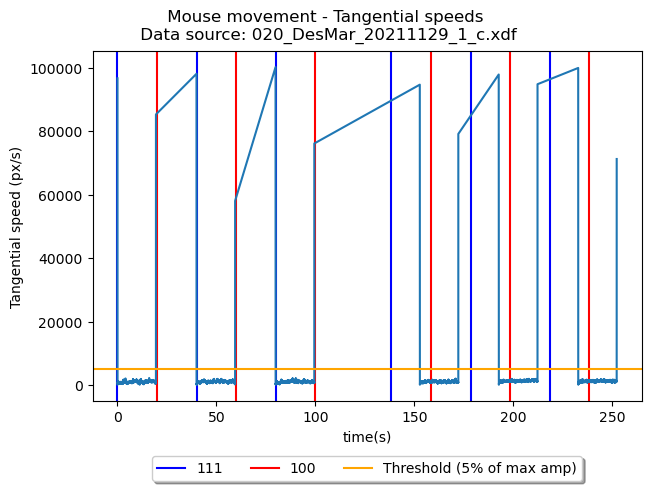

In [98]:
figure,axis=plt.subplots(layout="constrained")
figure.suptitle(f" Mouse movement - Tangential speeds \n Data source: {xdf_input_filename}")
show_markers2(plot_type=axis, markers_times_array=mouse_marker_times_labels2)

axis.plot(mouse_mocap_times,mouse_mocap_speeds)
axis.axhline(mouse_mocap_speeds_threshold,label="Threshold (5% of max amp)",color="orange")
axis.set_ylabel("Tangential speed (px/s)")
axis.set_xlabel("time(s)")
axis.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3)